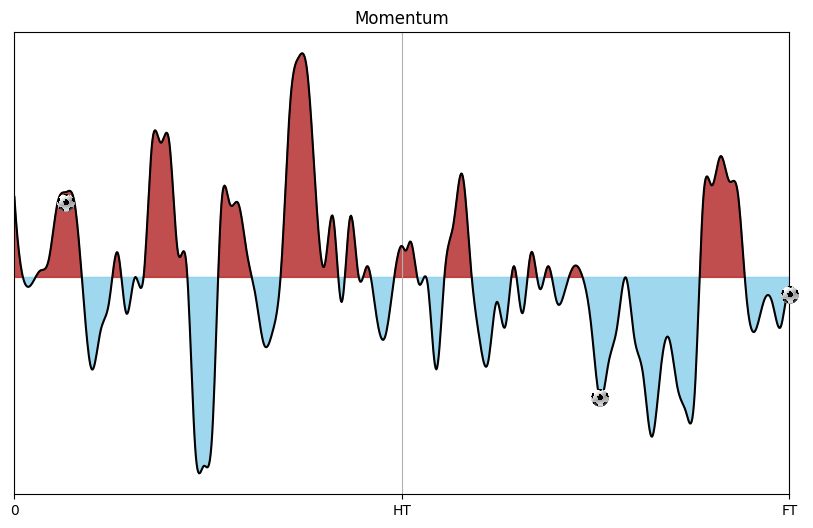

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from main_data import main_content, data


def print_momentum_data(data: dict):

    minutes = np.array([entry['minute'] for entry in data])
    values = np.array([entry['value'] for entry in data])

    unique_minutes, unique_indices = np.unique(minutes, return_index=True)
    unique_values = values[unique_indices]

    interpolation_model = interp1d(
        unique_minutes, unique_values, kind="cubic", fill_value="extrapolate")

    X_ = np.linspace(0, 90, 1000)

    Y_ = interpolation_model(X_)

    plt.figure(figsize=(10, 6))

    plt.fill_between(X_, Y_, where=(Y_ < 0),
                     interpolate=True, color='skyblue', alpha=0.8)

    plt.fill_between(X_, Y_, where=(Y_ >= 0),
                     interpolate=True, color='firebrick', alpha=0.8)

    plt.plot(X_, Y_, color='black')
    plt.xlim(0, 90)
    plt.xticks(np.arange(0, 91, step=45), labels=['0', "HT", "FT"])
    plt.yticks([])
    plt.grid(True, axis='x')
    for minute in goals_minutes:
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.025), (minute, values[minute]), frameon=False)
        plt.gca().add_artist(ab)

    plt.title('Momentum')

    plt.show()


momentum_data = main_content['matchFacts']['momentum']['main']['data']

home_team_goals_data = data['props']['pageProps']['header']['events']['homeTeamGoals']
away_team_goals_data = data['props']['pageProps']['header']['events']['awayTeamGoals']

goals_minutes = []

# Read an image from a file into an array.
path = './ball.png'
image = plt.imread(path)


# Set goal minute into array
for goal in home_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])

for goal in away_team_goals_data.values():
    for el in goal:
        goals_minutes.append(el['time'])


print_momentum_data(momentum_data)